In [21]:
# Dependencies
import requests
import json
import quandl #https://docs.quandl.com/docs/python-time-series give a how to guide
from config import q_api_key as api_key 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook 

In [2]:
#use this call to set the api_key
quandl.ApiConfig.api_key = api_key

In [3]:
#pull in zipcode list
zipcode_df=pd.read_csv("zipcode.csv")
#turn zipcode into a list
zipcodes=zipcode_df['Zip Code'].tolist()

#create a blank list for median home values and median rent
medianrent=[]
medianhomevalues=[]
#pull median home value for each zip code in Chicago at the yearly level for 2018 only
for zipcode in range(0,len(zipcodes)):
    try:
        mr_raw=quandl.get(f"ZILLOW/Z{zipcode[x]}_ZRIAH", collapse="annual", start_date="2018-12-31", end_date="2018-12-31")
        mr_list=mr_raw["Value"].tolist()
        medianrent.append(mr_list[0])
        print(f'Pulled rent data for {zipcode[x]}')
    except:
        mr_missing='NaN'
        medianrent.append(mr_missing)
        print(f'Rent data for {zipcode[x]} not found')
    try:
        mhv_raw=quandl.get(f"ZILLOW/Z{zipcode[x]}_ZHVIAH", collapse="annual", start_date="2018-12-31", end_date="2018-12-31")
        mhv_list=mhv_raw["Value"].tolist()
        medianhomevalues.append(mhv_list[0])
        print(f'Pulled home value data for {zipcode[x]}')
    except:
        mhv_missing='NaN'
        medianhomevalues.append(mhv_missing)
        print(f'Home value data for {zipcode[x]} not found')
print(medianrent)
print(medianhomevalues)

Pulled rent data for 60601
Pulled home value data for 60601
Pulled rent data for 60602
Home value data for 60602 not found
Pulled rent data for 60603
Home value data for 60603 not found
Pulled rent data for 60604
Home value data for 60604 not found
Pulled rent data for 60605
Pulled home value data for 60605
Pulled rent data for 60606
Pulled home value data for 60606
Pulled rent data for 60607
Pulled home value data for 60607
Pulled rent data for 60608
Pulled home value data for 60608
Pulled rent data for 60609
Pulled home value data for 60609
Pulled rent data for 60610
Pulled home value data for 60610
Pulled rent data for 60611
Pulled home value data for 60611
Pulled rent data for 60612
Pulled home value data for 60612
Pulled rent data for 60613
Pulled home value data for 60613
Pulled rent data for 60614
Pulled home value data for 60614
Pulled rent data for 60615
Pulled home value data for 60615
Pulled rent data for 60616
Pulled home value data for 60616
Pulled rent data for 60617
Home

In [8]:
#create a dataframe of zipcode, median rent, and median home values
housing_df = pd.DataFrame({"Zipcode":zipcode, "Median Rent":medianrent, "Median Home Value":medianhomevalues})
housing_df.head()

,Zipcode,Median Rent,Median Home Value
0,60601,1944.0,391100
1,60602,1666.0,NaN
2,60603,1630.0,NaN
3,60604,1835.0,NaN
4,60605,1865.0,284100


In [9]:
housing_df.to_csv("housing_data.csv", encoding="utf-8", index=False)

<IPython.core.display.Javascript object>


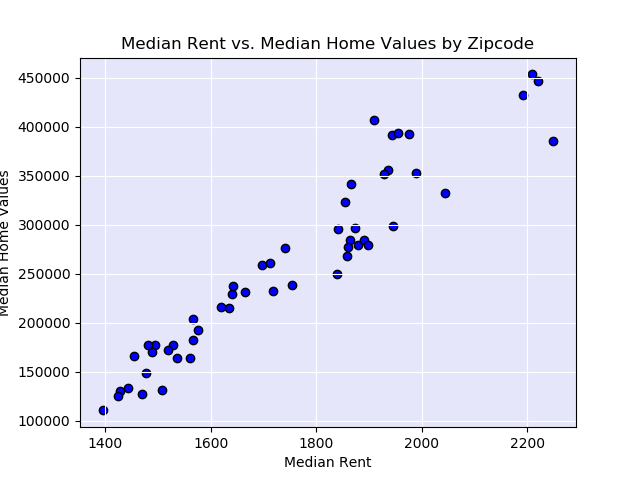

In [10]:
fig, ax1 = plt.subplots()
ax1.set_facecolor("lavender")
plt.scatter(medianrent,medianhomevalues, edgecolor="black", c="blue", marker='o')
plt.grid(color="white")
plt.title("Median Rent vs. Median Home Values by Zipcode")
plt.ylabel("Median Home Values")
plt.xlabel("Median Rent")
plt.show()